### Import libraries

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#magic line
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#load the dataset
dataset=pd.read_csv("C:/Users/HP/Desktop/Data Science Class/Data_Cleaning_Exercise/Salary_Data-updated.csv")
#display the full dataset
dataset.head() #loads only the first 5 rows

,YearsExperience,Age,Industry,Country,Salary
0,1.1,23,Fashion,china,39343
1,1.3,40,Banking,india,46205
2,1.5,22,Accounts,nigeria,37731
3,2.0,26,Tech,china,43525
4,2.2,28,NaN,britain,39891


In [3]:
#data hypothesis
#what is the task = predict the salary of a person based on their years of experience
#what are my features = YearsExperience
#what is the target label = Salary column
#find correlation between the features
dataset.info() #Not A Number - NAN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  120 non-null    float64
 1   Age              120 non-null    int64  
 2   Industry         92 non-null     object 
 3   Country          112 non-null    object 
 4   Salary           120 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


In [4]:
#Checking the shape the train dataset
dataset.shape

(120, 5)

### Data Visualization

In [5]:
#visualize target variables for relationship
corr = dataset.corr() #check how the independent variable relates with the dependent variable. Corr is short for correlation
corr

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.388166,0.978242
Age,0.388166,1.000000,0.403490
Salary,0.978242,0.403490,1.000000


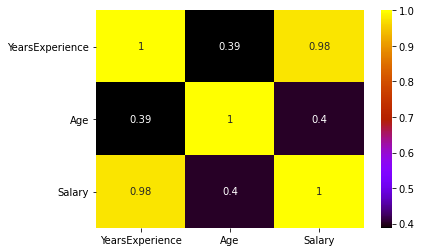

In [6]:
dataplot = sns.heatmap(corr, cmap='gnuplot', annot=True)
plt.show()

### Data Wrangling

In [7]:
dataset.describe()

,YearsExperience,Age,Salary
count,120.000000,120.000000,120.000000
mean,5.313333,41.466667,76003.000000
std,2.801888,10.965901,27066.663953
min,1.100000,22.000000,37731.000000
25%,3.200000,31.000000,56642.000000
50%,4.700000,44.500000,65237.000000
75%,7.900000,52.000000,101302.000000
max,10.500000,56.000000,122391.000000


In [8]:
#data cleaning
dataset.isnull().sum( )

YearsExperience     0
Age                 0
Industry           28
Country             8
Salary              0
dtype: int64

In [11]:
#change the column name for ease of usage
dataset.rename(columns={"YearsExperience":"yr_e", "Age": "age", "Industry": "ind", "Country": "country", "Salary":"salary"}, inplace=True)
dataset #views/displays dataset

,yr_e,age,ind,country,salary
0,1.1,23,Fashion,china,39343
1,1.3,40,Banking,india,46205
2,1.5,22,Accounts,nigeria,37731
3,2.0,26,Tech,china,43525
4,2.2,28,NaN,britain,39891
...,...,...,...,...,...
115,9.0,48,medicine,india,105582
116,9.5,46,Banking,britain,116969
117,9.6,31,medicine,britain,112635
118,10.3,53,Tech,britain,122391


In [12]:
#fill missing values with mode for string(value that appear the most), and fill in the missing values with mean and median (for figures)
nan_features =["ind","country"]
for nan_feat in nan_features:
    dataset[nan_feat].fillna(dataset [nan_feat].mode()[0], inplace = True)

In [13]:
#check if missing values still exist
dataset.isnull().sum()

yr_e       0
age        0
ind        0
country    0
salary     0
dtype: int64

In [15]:
dataset.head()

,yr_e,age,ind,country,salary
0,1.1,23,Fashion,china,39343
1,1.3,40,Banking,india,46205
2,1.5,22,Accounts,nigeria,37731
3,2.0,26,Tech,china,43525
4,2.2,28,Tech,britain,39891


In [25]:
train_data = dataset.copy()

In [26]:
train_data.head()

,yr_e,age,ind,country,salary
0,1.1,23,Fashion,china,39343
1,1.3,40,Banking,india,46205
2,1.5,22,Accounts,nigeria,37731
3,2.0,26,Tech,china,43525
4,2.2,28,Tech,britain,39891


In [27]:
#check for unique values
train_data.ind.unique()

array(['Fashion', 'Banking', 'Accounts', 'Tech', 'medicine', 'fashion'],
      dtype=object)

In [28]:
#check for unique values
train_data.ind.unique()

array(['Fashion', 'Banking', 'Accounts', 'Tech', 'medicine', 'fashion'],
      dtype=object)

In [20]:
categorical_column = ['ind']
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace('Fashion','fashion')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace('Fashion','fashion'))
        else:
            return ''

In [29]:
for cat in categorical_column:
    train_data[cat] = train_data[str.lower(cat)].apply(clean_data)

In [30]:
train_data.head()

,yr_e,age,ind,country,salary
0,1.1,23,fashion,china,39343
1,1.3,40,banking,india,46205
2,1.5,22,accounts,nigeria,37731
3,2.0,26,tech,china,43525
4,2.2,28,tech,britain,39891


### Feature Engineering

In [ ]:
#Exploratory data analysis -- EDA = Data Wrangling+ feature Engineering

In [31]:
#hot encoding
#create dummies for country column
country_dummy = pd.get_dummies(train_data['country'],prefix_sep='_', prefix='country')
country_dummy.head()

,country_britain,country_china,country_india,country_nigeria
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


In [32]:
#merge encoded columns and train_dataset column
train_dataset = pd.concat([train_data,country_dummy], axis=1)
train_dataset

,yr_e,age,ind,country,salary,country_britain,country_china,country_india,country_nigeria
0,1.1,23,fashion,china,39343,0,1,0,0
1,1.3,40,banking,india,46205,0,0,1,0
2,1.5,22,accounts,nigeria,37731,0,0,0,1
3,2.0,26,tech,china,43525,0,1,0,0
4,2.2,28,tech,britain,39891,1,0,0,0
...,...,...,...,...,...,...,...,...,...
115,9.0,48,medicine,india,105582,0,0,1,0
116,9.5,46,banking,britain,116969,1,0,0,0
117,9.6,31,medicine,britain,112635,1,0,0,0
118,10.3,53,tech,britain,122391,1,0,0,0


In [33]:
#drop country column
train_dataset.drop('country',axis=1,inplace=True)
train_dataset.head()

,yr_e,age,ind,salary,country_britain,country_china,country_india,country_nigeria
0,1.1,23,fashion,39343,0,1,0,0
1,1.3,40,banking,46205,0,0,1,0
2,1.5,22,accounts,37731,0,0,0,1
3,2.0,26,tech,43525,0,1,0,0
4,2.2,28,tech,39891,1,0,0,0


In [34]:
#label encoding
le = LabelEncoder()
train_dataset['ind'] = le.fit_transform(train_dataset['ind'])
train_dataset.head()

,yr_e,age,ind,salary,country_britain,country_china,country_india,country_nigeria
0,1.1,23,2,39343,0,1,0,0
1,1.3,40,1,46205,0,0,1,0
2,1.5,22,0,37731,0,0,0,1
3,2.0,26,4,43525,0,1,0,0
4,2.2,28,4,39891,1,0,0,0


In [35]:
y = train_dataset.pop('salary')

In [52]:
# the independent variables set
#check for multicollinearity using variance inflation factor
def vif(feat):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = feat.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(feat.values, i) for i in range(len(feat.columns))]
    print(vif_data)

In [55]:
vif(train_dataset) # <5 is good, >5 is bad

           feature        VIF
0             yr_e   1.504001
1              age   1.289205
2              ind   1.037644
3  country_britain   3.992629
4    country_china   6.232083
5    country_india  11.527749
6  country_nigeria   3.669639


<AxesSubplot:>

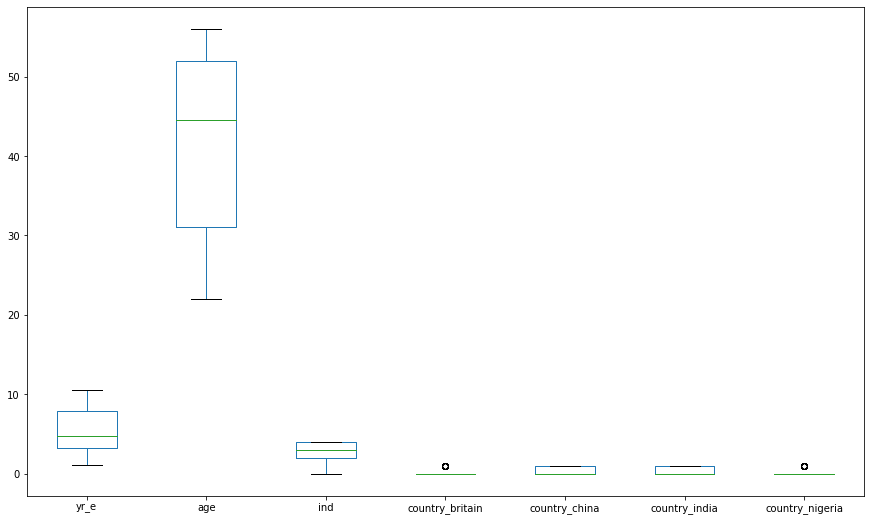

In [56]:
#let's identify outliers in the data, outliers will be indicated as small circles
train_dataset.plot(kind="box", figsize=(15,9))

In [57]:
X = train_data.iloc[:,0].values
X = np.reshape(X,newshape=(-1,1))
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3

In [40]:
y = np.array(y)

In [41]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [42]:
#print variable shapes to confirm they're equal
print(X_train.shape, y_train.shape)

(96, 1) (96,)


### Modelling

In [43]:
#load model
lr = LinearRegression()

In [44]:
#fit/train the model
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
#make prediction on the X_test
y_lr_pred = lr.predict(X_test)
y_lr_pred

array([ 53119.92814933, 107605.14568163, 124514.35112269, 116059.74840216,
        75665.53540407,  73786.73479951,  38089.52331283,  92574.74084513,
        81301.93721776,  55938.12905617,  55938.12905617,  60635.13056757,
        39968.32391739,  39968.32391739, 102908.14417022, 115120.34809988,
        73786.73479951,  64392.7317767 ,  55938.12905617,  39968.32391739,
       100089.94326338,  75665.53540407, 102908.14417022,  81301.93721776])

### Model Evaluation

In [49]:
#check model accuracy
lr.score(X_test,y_test)

0.9575798130894972

In [50]:
#check model accuracy
lr.score(X_test,y_lr_pred)

1.0

In [11]:
#inference and conclusion